In [1]:
import nwslpy
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from common import NWSL, Fonts, Images, Colors, add_twitter_handle, add_source

In [2]:
# Load data
teams = nwslpy.load_teams()
players = nwslpy.load_players()
teams_2022 = ["CHI", "HOU", "NJY", "RGN", "ORL", "POR", "WAS", "NC", "KCC", "LOU", "LA", "SD"]

df = pd.concat(
    [nwslpy.load_player_season_stats(team, "2022") for team in teams_2022]
)
df

,player_id,team_id,season,long_passes_unsuccessful,sub_on,games_played,sub_off,open_play_crosses_unsuccessful,clearances_total,total_fouls_won,...,gk_smother,saves_made_caught,own_goals,crosses_not_claimed,tackle_last_man,tackles_last_man,goals_set_piece,goalkicks_total,goals_other,penalties_off_target
0,635,2,2022,19,13,18,4,15,23,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,325,2,2022,17,0,3,0,0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28,2,2022,56,3,23,1,5,35,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,633,2,2022,2,10,19,8,3,10,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,629,2,2022,0,3,4,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,352,16,2022,6,8,14,6,0,4,9,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,697,16,2022,48,0,4,0,0,1,1,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,692,16,2022,14,8,23,14,40,3,24,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,26,16,2022,64,2,24,5,28,48,4,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Remove duplicate player rows
df = df.groupby("player_id").agg(
    {
        "minutes": "first",
        "offsides": "first",
        "shots_on_target": "first",
        "goals": "first",
    }
)
# Join with player details
df = df.join(players)
df = df[(df["player_position"] == "Attacker") & (df["minutes"] > 360)]
df

,minutes,offsides,shots_on_target,goals,player_first_name,player_last_name,player_short_first_name,player_short_last_name,player_match_name,player_nationality,player_position,player_place_of_birth,player_known_name,last_updated
player_id,,,,,,,,,,,,,,
42,686,2,10,2,Christen Annemarie,Press,Christen,Press,C. Press,USA,Attacker,Los Angeles,NaN,2023-02-06
99,896,2,7,0,Janine Elizabeth,Beckie,Janine,Beckie,J. Beckie,Canada,Attacker,Highlands Ranch,NaN,2023-02-06
100,539,4,9,4,Rachel Ann,Daly,Rachel,Daly,R. Daly,England,Attacker,Harrogate,NaN,2023-02-06
140,1021,20,15,7,Megan Anna,Rapinoe,Megan,Rapinoe,M. Rapinoe,USA,Attacker,Redding,NaN,2023-02-06
185,876,3,1,0,Jasmyne Bryanne,Spencer,Jasmyne,Spencer,J. Spencer,USA,Attacker,Bay Shore,NaN,2023-02-06
187,1647,31,27,16,Alexandra,Morgan Carrasco,Alex,Morgan,A. Morgan,USA,Attacker,San Dimas,NaN,2023-02-06
202,695,2,10,6,Nadia,Nadim,Nadia,Nadim,N. Nadim,Denmark,Attacker,Herat,NaN,2023-02-06
237,736,0,10,3,Makenzy Allyson,Doniak,Makenzy,Doniak,M. Doniak,USA,Attacker,Chino Hills,NaN,2023-02-06
239,1739,18,12,3,Jessica Marie,McDonald,Jessica,McDonald,J. McDonald,USA,Attacker,Phoenix,NaN,2023-02-06


In [4]:
# Calculate derived stats
df["offside_per_90"] = df["offsides"] * 90 / df["minutes"]
df["shots_on_target_per_90"] = df["shots_on_target"] * 90 / df["minutes"]
df["goals_per_90"] = df["goals"] * 90 / df["minutes"]

<ipython-input-14-e2a71e503634>:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 720x504 with 0 Axes>

<Figure size 12000x8400 with 0 Axes>

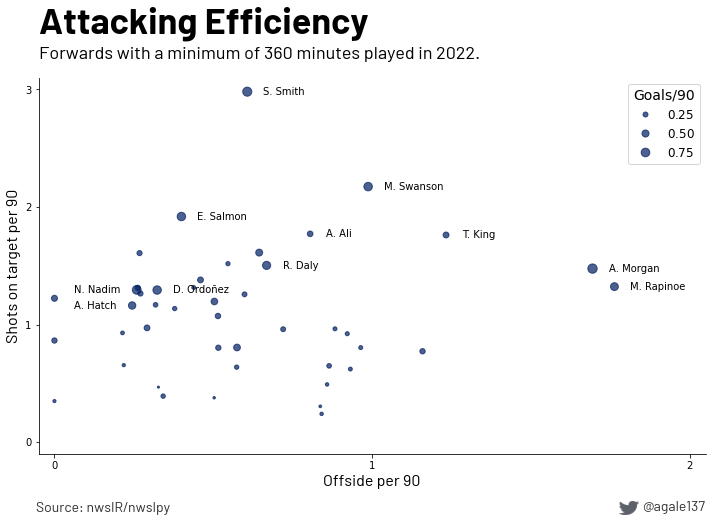

In [14]:
plt.clf()
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["legend.fontsize"] = "12"
plt.rcParams["legend.title_fontsize"] = "14"
plt.figure(dpi=1200, facecolor="white")
fig, ax = plt.subplots()
fig.patch.set_facecolor("white")

# Plot data
scatter = ax.scatter(
    df["offside_per_90"],
    df["shots_on_target_per_90"],
    s=df["goals_per_90"] * 100,
    color="#001e60",
    alpha=0.7,
)

# Add labels
for i, row in df.iterrows():
    if (row["offside_per_90"] + row["shots_on_target_per_90"] > 2.5) or row[
        "goals_per_90"
    ] > 0.5:
        right = row["player_match_name"] in ["A. Hatch", "N. Nadim"]
        ax.annotate(
            row["player_match_name"],
            (
                row["offside_per_90"],
                row["shots_on_target_per_90"],
            ),
            xytext=(-16 if right else 16, 0),
            textcoords="offset pixels",
            va="center",
            ha="right" if right else "left",
        )

# Format axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim([-0.05, 2.05])
ax.set_xticks([0, 1, 2])
ax.set_xlabel("Offside per 90", fontproperties=Fonts.BARLOW, size=16)
ax.set_ylim([-0.1, 3.1])
ax.set_yticks([0, 1, 2, 3])
ax.set_ylabel("Shots on target per 90", fontproperties=Fonts.BARLOW, size=16)

# Legend
kw = dict(prop="sizes", color="#001e60", alpha=0.7, num=4, func=lambda s: s / 100)
legend2 = plt.legend(
    *scatter.legend_elements(**kw),
    loc="upper right",
    title="Goals/90",
    prop=Fonts.BARLOW.set_size(10)
)

# Title
ax.set_title(
    "Attacking Efficiency",
    fontproperties=Fonts.BARLOW_BOLD,
    size=36,
    ha="left",
    x=0,
    y=1.1,
)

# Subtitle
ax.text(
    0,
    1.05,
    "Forwards with a minimum of 360 minutes played in 2022.",
    fontproperties=Fonts.BARLOW,
    size=18,
    ha="left",
    transform=ax.transAxes,
)

# Twitter logo and username and source
add_twitter_handle(fig, x=0.86, y=-0.03, fs=14, w=0.03)
add_source(fig, "nwslR/nwslpy", x=0.055, y=-0.03)

# Proper spacing between subplots
fig.tight_layout()

# Save image
plt.savefig(
    "images/attacking_efficiency.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)